# Pandas Practice Notebook

This notebook contains a variety of **pandas exercises**.
Solve them step by step — write your own code in the empty cells.
The tasks range from beginner to portfolio level.

## Section 1: Series Basics
1. Create a `Series` of 6 random numbers. Print the mean, min, and max.
2. Create a `Series` of 7 weekdays. Select only the weekend days.
3. Create a `Series` with student names as index and their grades as values. Find the best student.

In [9]:
import numpy as np
import pandas as pd

rng = np.random.default_rng(42)
s = pd.Series(rng.integers(1, 11, 6))
print(s.mean(), s.min(), s.max())

weekdays = pd.Series(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print(weekdays[-2:])

students = pd.Series([43, 54, 65, 87, 97, 94, 77], index=['Tom', 'Lary', 'Carol', 'Sonya', 'Harry', 'Octavian', 'Peter'])
print(students.idxmax())

5.833333333333333 1 9
5    Saturday
6      Sunday
dtype: object
Harry


## Section 2: DataFrame Creation & Operations
4. Create a `DataFrame` with 5 employees: name, department, salary. Increase salary by 10% for IT department.
5. Create a `DataFrame` with 6 countries: name, population, area. Add a new column `density` = population / area. Sort by density (descending).
6. Create a `DataFrame` with 5 books: title, author, pages, price. Find the average price per page.

In [10]:
employees_data = {
    'name': ['Tom', 'Lary', 'Carol', 'Sonya', 'Harry'],
    'department': ['IT', 'HR', 'DS', 'ML', 'Finance'],
    'salary': [2000, 1500, 2200, 2300, 1900]
}
employees_df = pd.DataFrame(employees_data)
employees_df.loc[employees_df['department'] == 'IT', 'salary'] *= 1.1

countries_data = {
    "name": ["Ukraine", "Poland", "Germany", "France", "Italy", "Spain"],
    "population": [37_000_000, 38_000_000, 83_000_000, 65_000_000, 59_000_000, 47_000_000],
    "area": [603_548, 312_696, 357_386, 551_695, 301_340, 505_990]  # у км²
}
countries_df = pd.DataFrame(countries_data)
countries_df['density'] = countries_df['population'] / countries_df['area']
countries_df.sort_values(by='density', ascending=False)

books_data = {
    "title": [
        "The Pragmatic Programmer",
        "Clean Code",
        "Introduction to Algorithms",
        "Python Crash Course",
        "Deep Learning with Python"
    ],
    "author": [
        "Andrew Hunt",
        "Robert C. Martin",
        "Thomas H. Cormen",
        "Eric Matthes",
        "François Chollet"
    ],
    "pages": [352, 464, 1312, 544, 384],
    "price": [42.50, 37.99, 89.99, 29.95, 45.00]
}
books_df = pd.DataFrame(books_data)
average_price_per_page = (books_df['price'] / books_df['pages']).mean()
print(average_price_per_page)

0.08868924448937003


## Section 3: Importing & Cleaning Data
7. Load `sales.csv`. Show first 10 rows. Check for missing values.
8. Fill missing values in column `Revenue` with the column mean.
9. Rename all columns to lowercase.

In [11]:
df = pd.read_csv('csv/sales.csv', index_col='date')
df.head(10)
df.isnull().sum()
mean_revenue = df['revenue'].mean()
df['revenue'] = df['revenue'].fillna(mean_revenue)
df.columns = df.columns.str.lower()

## Section 4: GroupBy & Aggregation
10. Group sales by `Product` and calculate total revenue per product.
11. Group sales by `Region` and find average revenue per region.
12. Find the top-3 products with the highest total revenue.

In [12]:
df = pd.read_csv('csv/sales.csv')
total_revenue_by_product = df.groupby('product')['revenue'].sum()
print(total_revenue_by_product)
print(df.groupby('region')['revenue'].mean())
total_revenue_by_product.nlargest(3)
df

product
Product A     9250.0
Product B     8749.0
Product C     6487.0
Product D     9128.0
Product E    10579.0
Name: revenue, dtype: float64
region
Central    256.653846
East       234.377778
North      199.490566
South      205.969697
West       228.642857
Name: revenue, dtype: float64


,date,region,product,quantity,price,revenue
0,2023-02-08,East,Product D,3,64.33,193.0
1,2023-02-21,East,Product B,11,26.36,290.0
2,2023-01-29,West,Product A,11,18.55,204.0
3,2023-01-15,South,Product D,18,20.06,361.0
4,2023-02-12,South,Product E,15,13.60,204.0
...,...,...,...,...,...,...
195,2023-02-12,South,Product E,16,7.62,122.0
196,2023-01-29,East,Product B,8,18.62,149.0
197,2023-02-05,South,Product B,4,14.00,56.0
198,2023-01-13,North,Product B,8,1.25,10.0


## Section 5: Filtering & Selection
13. From `sales.csv`, select only rows where `Revenue` > 1000.
14. Select rows where `Quantity` is between 10 and 20.
15. Select only `Product` and `Revenue` columns.

In [13]:
df = pd.read_csv('csv/sales.csv')
df[df['revenue']>20]
df[df['quantity'].between(11,19)]
df[['product', 'revenue']]

,product,revenue
0,Product D,193.0
1,Product B,290.0
2,Product A,204.0
3,Product D,361.0
4,Product E,204.0
...,...,...
195,Product E,122.0
196,Product B,149.0
197,Product B,56.0
198,Product B,10.0


## Section 6: Realistic Case
16. Load `sales.csv`. Create a new column `Total` = `Quantity` × `Price`. Find the overall total revenue.
17. Create a pivot table: show average revenue per `Region` and `Product`.
18. Plot a bar chart of total revenue by region (using pandas `.plot`).

<Axes: xlabel='region'>

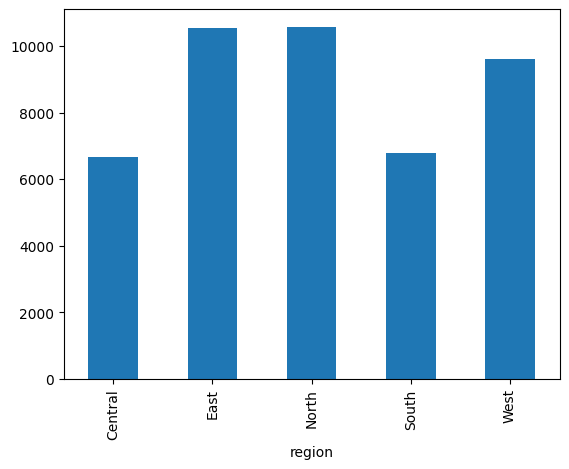

In [14]:
df = pd.read_csv('csv/sales.csv')
df['total'] = df['quantity'] * df['price']
df = df.drop(columns='revenue')
df.pivot_table(values='total', index='region', columns='product', aggfunc='mean')
df.groupby('region')['total'].sum().plot.bar()

## Section 7: Portfolio-Level Task
19. Write a function `analyze_dataframe(df)` that returns:
- shape (rows, columns)
- number of missing values
- mean of all numeric columns
20. Apply this function to your dataset.

In [15]:
from pandas import DataFrame

df = pd.read_csv('csv/sales.csv')
def analyze_dataframe(df: DataFrame)->dict:
    return {
        'Shape rows and columns': f'{df.shape[0]} rows and {df.shape[1]} columns',
        'Number of missing values': df.isnull().sum().sum(),
        'Mean of all numeric columns': df.mean(numeric_only=True)
    }
analyze_dataframe(df)

{'Shape rows and columns': '200 rows and 6 columns',
 'Number of missing values': np.int64(2),
 'Mean of all numeric columns': quantity     10.025000
 price        42.821106
 revenue     222.075377
 dtype: float64}